# Task 1 - Prediction using Supervised ML

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Splitting data into train and test sets

In [4]:
from sklearn.model_selection import train_test_split
X = data.drop('Scores', axis=1);
y = data['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
len(X_train), len(X_test), len(y_train), len(y_test)

(20, 5, 20, 5)

## Import and train the Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_preds = model.predict(X_test)

In [8]:
y_preds

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [9]:
y_preds.shape

(5,)

In [10]:
score = pd.DataFrame()

In [11]:
score['Predicted Scores'] = y_preds

In [12]:
score.head()

,Predicted Scores
0,83.188141
1,27.032088
2,27.032088
3,69.633232
4,59.951153


In [13]:
score['Actual Scores'] = y_test.to_list()

## Compare the predicted and actual scores

In [19]:
score

,Predicted Scores,Actual Scores
0,83.188141,81
1,27.032088,30
2,27.032088,21
3,69.633232,76
4,59.951153,62


In [15]:
model.score(X_test, y_test)

0.9678055545167994

## Predicted Score when a student studies for 9.25 hours

In [20]:
print('Score when a student studies for 9.25 hours:', model.predict([[9.25]]))

Score when a student studies for 9.25 hours: [92.38611528]


## Visualizing the train results

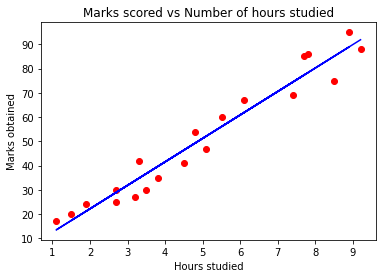

In [21]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Marks scored vs Number of hours studied')
plt.xlabel('Hours studied')
plt.ylabel('Marks obtained')
plt.show()

## Visualizing the test results


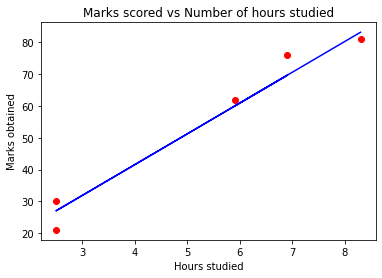

In [22]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_preds, color='blue')
plt.title('Marks scored vs Number of hours studied')
plt.xlabel('Hours studied')
plt.ylabel('Marks obtained')
plt.show()

## Checking efficiency of the model

In [25]:
# Using some model evaluation metrics such as Mean Squared Error, Mean Absolute Error and R2 Score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 18.943211722315272
Mean Absolute Error: 3.9207511902099244
R2 Score: 0.9678055545167994
